In [22]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import nmrglue


In [2]:
%matplotlib inline

In [3]:
spec2D = pickle.load?

In [5]:
fp = open("cosy_pinfo_pickle", "rb" )
pinfo = pickle.load( fp)
fp.close()

In [7]:
fp = open("cosy_info_pickle", "rb" )
info = pickle.load( fp)
fp.close()

In [18]:
pinfo

{'procs': {'OFFSET': 1.25, 'SW_p': 1000.0, 'SF': 400.0},
 'proc2s': {'OFFSET': 1.25, 'SW_p': 1000.0, 'SF': 400.0}}

In [10]:

fp = open("cosy_abs_pickle", "rb" )
nmr_spec_2d = pickle.load( fp)
fp.close()

In [12]:
nmr_spec_2d.shape

(1024, 1024)

In [16]:
class TwoD_NMR_MAT_plot:
    
    def __init__(self, expt, pinfo, info, dimensions_ppm=[], axis_units="ppm"):
        
#        print exp.shape
        
        self.expt = expt
        self.pinfo = pinfo
        self.info  = info
        
        self.rr,self.cc = expt.shape
        self.X = np.zeros(expt.shape)
        self.Y = np.zeros(expt.shape)
        
        r1=0
        r2=self.rr

        c1=0
        c2=self.cc
        
#        print r2,c2
        
        self.create_axes(  pinfo, info, self.rr, self.cc, dimensions_ppm )
          
        self.create_plot_layout(self.dimensions_index)
        
        self.plot_plots()
        

        
    def create_axes( self, pinfo, info, rr,cc, dimensions_ppm):
                
        self.f1_offset_p = pinfo['procs' ]['OFFSET']
        self.f1_sw_hz     = pinfo['procs' ]['SW_p']
        self.f1_omega    = pinfo['procs' ]['SF']
        self.f1_sw_ppm   = self.f1_sw_hz/self.f1_omega
        
        self.f2_offset_p = pinfo['proc2s' ]['OFFSET']
        self.f2_sw_hz     = pinfo['proc2s' ]['SW_p']
        self.f2_omega    = pinfo['proc2s' ]['SF']
        self.f2_sw_ppm   = self.f2_sw_hz/self.f2_omega
#        print self.f1_sw_ppm
        
        self.f1 = np.linspace(self.f1_offset_p, self.f1_offset_p-self.f1_sw_ppm,  self.rr)
        self.f2 = np.linspace(self.f2_offset_p, self.f2_offset_p-self.f2_sw_ppm,  self.cc)
        
        self.dw_f1_ppm = self.f1[1]-self.f1[0]
        self.dw_f2_ppm = self.f2[1]-self.f2[0]
        
        for r in range(self.rr):
    
            for c in range( self.cc):
        
                self.Y[r,c] = self.f1[r]
                self.X[r,c] = self.f2[c] 
                
#        print dimensions_ppm       
        if dimensions_ppm == []:
            self.dimensions_index = np.array([0,self.rr-1,0,self.cc-1])
        else:
            r1 = int( (dimensions_ppm[1]-self.f1_offset_p)/self.dw_f1_ppm)
            r2 = int( (dimensions_ppm[0]-self.f1_offset_p)/self.dw_f1_ppm)
            c1 = int( (dimensions_ppm[2]-self.f2_offset_p)/self.dw_f2_ppm)
            c2 = int( (dimensions_ppm[3]-self.f2_offset_p)/self.dw_f2_ppm)
            
            self.dimensions_index = np.array([r1,r2,c1,c2 ])
            
#        print "self.dimensions_index", self.dimensions_index
            
        self.Z1 = self.expt[self.dimensions_index[0]:self.dimensions_index[1],self.dimensions_index[2]:self.dimensions_index[3]]
        self.X1 =   self.X[self.dimensions_index[0]:self.dimensions_index[1],self.dimensions_index[2]:self.dimensions_index[3]]
        self.Y1 =   self.Y[self.dimensions_index[0]:self.dimensions_index[1],self.dimensions_index[2]:self.dimensions_index[3]]
        
        
    def create_plot_layout( self, dimensions_index):
        
#        print "dimensions_index",dimensions_index
        
        nullfmt   = NullFormatter()         # no labels

        # definitions for the axes
        left, width = 0.1, 0.65
        bottom, height = 0.1, 0.65
        bottom_h = left_h = left+width+0.02

        rect_scatter = [left, bottom, width, height]
        rect_histx = [left, bottom_h, width, 0.2]
        rect_histy = [left_h, bottom, 0.2, height]

        # start with a rectangular Figure
        plt.figure(2, figsize=(6,6))

        self.axScatter = plt.axes(rect_scatter)
        self.axHistx = plt.axes(rect_histx)
        self.axHisty = plt.axes(rect_histy)

# no labels
        self.axHistx.xaxis.set_major_formatter(nullfmt)
        self.axHisty.yaxis.set_major_formatter(nullfmt)
        
        self.axScatter.tick_params(axis='x', labelsize=16)
        self.axScatter.tick_params(axis='y', labelsize=16)
        self.axScatter.set_xlabel('${^1}$H [ppm]',fontsize=16)
        #ax.set_xlim(-60, 60)
        self.axScatter.set_ylabel('${^1}$H [ppm]', fontsize=16)
        
        self.axHistx.axis('off')
        self.axHisty.axis('off')

        f1_start = self.f1[dimensions_index[0]]
        f1_end   = self.f1[dimensions_index[1]]

        f2_start = self.f2[dimensions_index[2]]
        f2_end   = self.f2[dimensions_index[3]]

        self.axScatter.set_ylim( (f1_start, f1_end) )
        self.axScatter.set_xlim( (f2_start, f2_end) )
        
        

    def plot_plots(self):
        
        # the scatter plot:
        cl = np.linspace(self.Z1.max()*0.01, self.Z1.max()*1.1,10)
#        print "Z1.shape",self.Z1.shape
        

        sum_f1 = self.Z1.sum(axis=0)
#        print "len(sum_f1)",len(sum_f1)
        sum_f2 = self.Z1.sum(axis=1)
#        print "len(sum_f2)",len(sum_f2)

        cset = self.axScatter.contour(self.X1, self.Y1, self.Z1,  cl,  colors='red')
        #
        self.axHistx.plot(sum_f1, 'r-')
        self.axHisty.plot(sum_f2,range(len(sum_f2)),'r')


        self.axHistx.set_xlim( (0,len(sum_f1)-1) )
        self.axHisty.set_ylim( (0,len(sum_f2)-1) )        
        


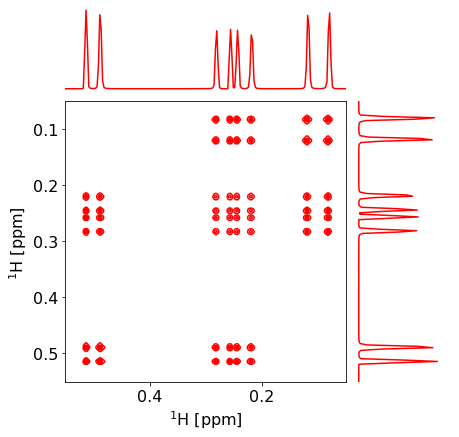

In [17]:
ppplot = TwoD_NMR_MAT_plot(nmr_spec_2d, pinfo, info, [0.05,0.55, 0.55,0.05] )

In [20]:
ppplot.X1[0]

array([0.55107527, 0.54863148, 0.54618768, 0.54374389, 0.5413001 ,
       0.5388563 , 0.53641251, 0.53396872, 0.53152493, 0.52908113,
       0.52663734, 0.52419355, 0.52174976, 0.51930596, 0.51686217,
       0.51441838, 0.51197458, 0.50953079, 0.507087  , 0.50464321,
       0.50219941, 0.49975562, 0.49731183, 0.49486804, 0.49242424,
       0.48998045, 0.48753666, 0.48509286, 0.48264907, 0.48020528,
       0.47776149, 0.47531769, 0.4728739 , 0.47043011, 0.46798631,
       0.46554252, 0.46309873, 0.46065494, 0.45821114, 0.45576735,
       0.45332356, 0.45087977, 0.44843597, 0.44599218, 0.44354839,
       0.44110459, 0.4386608 , 0.43621701, 0.43377322, 0.43132942,
       0.42888563, 0.42644184, 0.42399804, 0.42155425, 0.41911046,
       0.41666667, 0.41422287, 0.41177908, 0.40933529, 0.4068915 ,
       0.4044477 , 0.40200391, 0.39956012, 0.39711632, 0.39467253,
       0.39222874, 0.38978495, 0.38734115, 0.38489736, 0.38245357,
       0.38000978, 0.37756598, 0.37512219, 0.3726784 , 0.37023

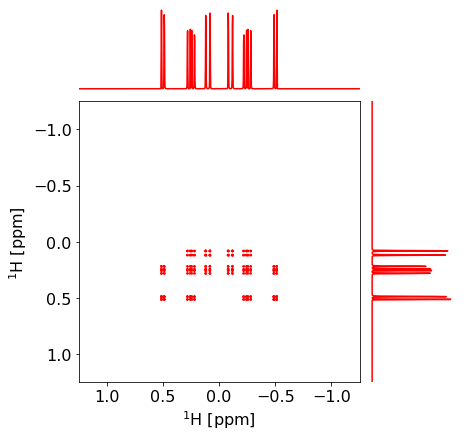

In [21]:
ppplot2 = TwoD_NMR_MAT_plot(nmr_spec_2d, pinfo, info )

In [24]:
print(dir(nmrglue.bruker))

['__builtins__', '__cached__', '__developer_info__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_merge_dict', 'add_axis_to_udic', 'array_to_int', 'bruker_dsp_table', 'bruker_nd', 'complexify_data', 'create_acqus_dic', 'create_data', 'create_dic', 'division', 'fileiobase', 'get_data', 'get_trace', 'guess_shape', 'guess_shape_and_submatrix_shape', 'guess_udic', 'np', 'os', 'parse_jcamp_line', 'parse_jcamp_value', 'print_function', 'proc_base', 'put_data', 'read', 'read_acqus_file', 'read_binary', 'read_binary_lowmem', 'read_jcamp', 'read_lowmem', 'read_pdata', 'read_pdata_binary', 'read_pprog', 'read_procs_file', 'reduce', 'remove_digital_filter', 'reorder_submatrix', 'rm_dig_filter', 'scale_pdata', 'uncomplexify_data', 'warn', 'write', 'write_binary', 'write_binary_lowmem', 'write_jcamp', 'write_jcamp_pair', 'write_lowmem', 'write_pdata', 'write_pprog']
